# <font color='red'>Information About the Project. </font> 

The main idea emphasized in this study is to discuss whether the selection of algorithms applied to the data by using agricultural data or the dataset before the algorithms are essential. This issue will be addressed in depth in the conclusion section at the end of the project.

## <font color='red'>Scenario 1. </font> 

In the first scenario, the agricultural production power of the mentioned countries was tried to be calculated by using the variables **(1) Suitable for Agriculture, (2) Number of Persons Working in the Agricultural Field, (3) Annual Average Rainfall, and (4) Annual Average Temperature**. The primary purpose of this study is to discuss whether all of these variables are effective in the agricultural production of countries or whether the developing technologies and innovative changes in the farming field are more important than these accepted variables.

#### 1.1 Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np 
import warnings
import seaborn as sns # For Visualization
import matplotlib.pyplot as plt #For Visualization
from scipy.stats import skew # For Skewness
from scipy import stats # For General Statistics
import pylab as p # For Skewness
from scipy.stats import kurtosis #For Kurtosis
from scipy import stats
from scipy.stats import chisquare
import missingno as msno
from sklearn.neighbors import LocalOutlierFactor # AnomalyDetection
from scipy.stats import wilcoxon
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor #  Regressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV 


warnings.filterwarnings('ignore')

#### 1.2. Loading The Data Into The DataFrame

In [6]:
arable_land           = pd.read_csv("Countries Arable Lands - 1990-2020.csv")
people_in_farm        = pd.read_csv("Number of People Working in Agriculture 1990-2020.csv")
precipitation         = pd.read_csv("Observed Average Annual Mean-Precipitation - 1990-2020.csv")
temperature           = pd.read_csv("Observed Average Annual Mean-Temperature-1990-2020.csv")
production_ie         = pd.read_csv("Ireland Production Total .csv")
production_de         = pd.read_csv("Germany Production Total .csv")
production_nl         = pd.read_csv("Netherland Production Totals.csv")

# Each dataset has a "year" column. So, it is dropped to avoid confusion.
arable_land           = arable_land.drop(["Year"],axis=1)
people_in_farm        = people_in_farm.drop(["Year"], axis=1) 
precipitation         = precipitation.drop(["Year"],axis=1)
temperature           = temperature.drop(["Year"], axis=1) 
production_ireland    = production_ie.drop(["Year"], axis=1) 
production_germany    = production_de.drop(["Year"], axis=1)
production_nl1 = production_nl.rename(columns={'Production Totals': 'Netherland Production Total (Tonnes)'})
production_netherland = production_nl1.drop(["Year"],axis=1)

#### 1.3. Loading The Data Into The DataFrame

In [26]:
# 1.3.1 Ireland Dataset Prepared
year_hectar_ireland    = arable_land.iloc[:,0:2]
people_farm_ireland    = people_in_farm.iloc[:,0:1]
precipitation_ireland  = precipitation.iloc[:,0:1]
temperature_ireland    = temperature.iloc[:,0:1]

columns_ireland = [year_hectar_ireland, people_farm_ireland, precipitation_ireland,temperature_ireland,production_ireland]
ireland_dataset = pd.concat((columns_ireland),axis=1)

In [29]:
# 1.3.2 Germany Dataset Prepared
year_hectar_germany     = arable_land.iloc[:,1:2]
people_farm_germany     = people_in_farm.iloc[:,1:2]
precipitation_germany   = precipitation.iloc[:,1:2]
temperature_germany     = temperature.iloc[:,1:2]

columns_germany  = [year_hectar_germany,people_farm_germany,precipitation_germany,temperature_germany,production_germany]
germany_dataset  = pd.concat((columns_germany),axis=1)

In [42]:
# 1.3.3 Netherland Dataset Prepared
year_hectar_netherland     = arable_land.iloc[:,2:3]
people_farm_netherland     = people_in_farm.iloc[:,2:3]
precipitation_netherland   = precipitation.iloc[:,2:3]
temperature_netherland     = temperature.iloc[:,2:3]

columns_netherland  = [year_hectar_netherland,people_farm_netherland,precipitation_netherland,temperature_netherland,production_netherland]
netherland_dataset  = pd.concat((columns_netherland),axis=1)

#### 1.4 Basic Information About Data

In [46]:
# 1.4.1 Check Shape of Datasets
print("Shape of Ireland Dataset is ..:", ireland_dataset.shape)
print("Shape of Germany Dataset is ..:", germany_dataset.shape)
print("Shape of Netherland Dataset is ..:", netherland_dataset.shape)

Shape of Ireland Dataset is ..: (31, 6)
Shape of Germany Dataset is ..: (31, 5)
Shape of Netherland Dataset is ..: (31, 5)


In [47]:
# 1.4.2 DTypes.. 
print("DTypes of Ireland Dataset is ..:\n", ireland_dataset.dtypes)
print("-------------")

print("DTypes of Germany Dataset is ..:\n", germany_dataset.dtypes);
print("-------------")

print("DTypes of Netherland Dataset is ..:\n", netherland_dataset.dtypes);

DTypes of Ireland Dataset is ..:
 Ireland(hectares)                    float64
Germany(hectares)                    float64
Ireland                              float64
Ireland(mm)                          float64
Ireland(C)                           float64
Ireland Production Total (Tonnes)    float64
dtype: object
-------------
DTypes of Germany Dataset is ..:
 Germany(hectares)                    float64
Germany                              float64
Germany(mm)                          float64
Germany(C)                           float64
Germany Production Total (Tonnes)    float64
dtype: object
-------------
DTypes of Netherland Dataset is ..:
 Netherlands(hectares)                   float64
Netherlands                             float64
Netherlands(mm)                         float64
Netherlands(C)                          float64
Netherland Production Total (Tonnes)    float64
dtype: object


In [48]:
# 1.4.3 Info on Dataset
print("Ireland Dataset info ...:");
ireland_dataset.info();

Ireland Dataset info ...:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Ireland(hectares)                  31 non-null     float64
 1   Germany(hectares)                  31 non-null     float64
 2   Ireland                            29 non-null     float64
 3   Ireland(mm)                        31 non-null     float64
 4   Ireland(C)                         31 non-null     float64
 5   Ireland Production Total (Tonnes)  31 non-null     float64
dtypes: float64(6)
memory usage: 1.6 KB


In [49]:
print("Germany Dataset info ...:");
germany_dataset.info();

Germany Dataset info ...:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Germany(hectares)                  31 non-null     float64
 1   Germany                            29 non-null     float64
 2   Germany(mm)                        31 non-null     float64
 3   Germany(C)                         31 non-null     float64
 4   Germany Production Total (Tonnes)  31 non-null     float64
dtypes: float64(5)
memory usage: 1.3 KB


In [50]:
print("Netherland Dataset info ...:");
netherland_dataset.info();

Netherland Dataset info ...:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Netherlands(hectares)                 31 non-null     float64
 1   Netherlands                           29 non-null     float64
 2   Netherlands(mm)                       31 non-null     float64
 3   Netherlands(C)                        31 non-null     float64
 4   Netherland Production Total (Tonnes)  31 non-null     float64
dtypes: float64(5)
memory usage: 1.3 KB


In [51]:
# 1.4.4  Take a Look at the Datas
#Ireland
print("Ireland Datasets Info...:")
ireland_dataset.head()

Ireland Datasets Info...:


,Ireland(hectares),Germany(hectares),Ireland,Ireland(mm),Ireland(C),Ireland Production Total (Tonnes)
0,382200.0,11971000.0,NaN,1186.73,10.01,2426000.0
1,370200.0,11559000.0,202332.0,1070.58,9.51,2393000.0
2,344200.0,11467000.0,195727.0,1129.81,9.45,2520000.0
3,364200.0,11676000.0,194929.0,1229.93,9.28,2066000.0
4,355200.0,11805000.0,191292.0,1309.49,9.49,2124000.0


In [52]:
# Germany
print("Germany Datasets Info...:")
germany_dataset.head()

Germany Datasets Info...:


,Germany(hectares),Germany,Germany(mm),Germany(C),Germany Production Total (Tonnes)
0,11971000.0,NaN,734.15,9.81,43704883.0
1,11559000.0,1390000.0,604.17,8.73,41306695.0
2,11467000.0,1360000.0,735.03,9.64,38635108.0
3,11676000.0,1330000.0,793.47,8.76,39032416.0
4,11805000.0,1300000.0,789.20,9.94,37051599.0


In [53]:
# Netherland
print("Netherland Datasets Info...:")
netherland_dataset.head()

Netherland Datasets Info...:


,Netherlands(hectares),Netherlands,Netherlands(mm),Netherlands(C),Netherland Production Total (Tonnes)
0,879000.0,NaN,729.29,10.74,10116900.0
1,881000.0,298410.0,657.72,9.52,9882647.0
2,887000.0,296570.0,813.90,10.39,10719791.0
3,887000.0,293098.0,868.94,9.49,10792500.0
4,885000.0,291458.0,888.58,10.55,10189000.0


In [54]:
# 1.4.5 Correlation.

# Ireland
ireland_dataset.corr()["Ireland Production Total (Tonnes)"].sort_values()

Ireland                             -0.233508
Ireland(mm)                         -0.090342
Ireland(C)                          -0.021277
Germany(hectares)                    0.217288
Ireland(hectares)                    0.268223
Ireland Production Total (Tonnes)    1.000000
Name: Ireland Production Total (Tonnes), dtype: float64

In [55]:
# Germany
germany_dataset.corr()["Germany Production Total (Tonnes)"].sort_values()

Germany                             -0.486968
Germany(mm)                          0.066927
Germany(C)                           0.098460
Germany(hectares)                    0.495550
Germany Production Total (Tonnes)    1.000000
Name: Germany Production Total (Tonnes), dtype: float64

In [57]:
# Netherland
netherland_dataset.corr()["Netherland Production Total (Tonnes)"].sort_values()

Netherlands(C)                         -0.279159
Netherlands(mm)                        -0.002476
Netherlands(hectares)                   0.006637
Netherlands                             0.153370
Netherland Production Total (Tonnes)    1.000000
Name: Netherland Production Total (Tonnes), dtype: float64

#### 1.5  Descriptive Statistics Process

In this section, the statistical properties of the data set in general (quantity, mean, minimum and maximum value, standard deviation, quarters such as 25%, 50% and 75%) will be determined, histograms of the data sets will be drawn, and Box Plot charts will be drawn to determine the interquartile range. In addition, Skewness and Variance values will be found and interpreted at the reporting stage.

In [58]:
# 1.5.1. Describe the Data

# Ireland
print("Ireland Dataset Basic Statistical Expressions..:")
ireland_dataset.describe().T

# Burayı yorumlayabiliriz. Mesela diyebiliriz ki İrlandanın hektarı 344.200 ile 531.230 hektar arasında değişiyor, hollandanın
# su sekilde almanya bu sekilde vs. Hatta buradan hareketle veri setindeki en küçük hektar sudur budur vs. Bunu bütün veriler kolonlar
# için yapabiliriz!. 

Ireland Dataset Basic Statistical Expressions..:


,count,mean,std,min,25%,50%,75%,max
Ireland(hectares),31.0,4.413145e+05,52014.682468,344200.00,395700.00,453000.00,4.705600e+05,531230.00
Germany(hectares),31.0,1.181058e+07,107214.045782,11467000.00,11781500.00,11834000.00,1.187550e+07,11971000.00
Ireland,29.0,1.444154e+05,28296.054688,107638.00,126620.00,130569.00,1.574510e+05,202332.00
Ireland(mm),31.0,1.204098e+03,118.529419,971.09,1123.33,1186.73,1.299445e+03,1451.22
Ireland(C),31.0,9.744194e+00,0.339733,8.72,9.51,9.77,1.001000e+01,10.28
Ireland Production Total (Tonnes),31.0,2.415017e+06,239214.456826,1940050.00,2245200.00,2426000.00,2.561958e+06,2898000.00


In [59]:
# Germany
print("Germany Dataset Basic Statistical Expressions..:")
germany_dataset.describe().T

Germany Dataset Basic Statistical Expressions..:


,count,mean,std,min,25%,50%,75%,max
Germany(hectares),31.0,1.181058e+07,1.072140e+05,11467000.00,1.178150e+07,11834000.00,1.187550e+07,11971000.00
Germany,29.0,9.203789e+05,2.824038e+05,530842.00,6.510590e+05,957214.00,1.160000e+06,1390000.00
Germany(mm),31.0,7.290574e+02,8.044148e+01,568.34,6.769150e+02,731.39,7.853200e+02,910.58
Germany(C),31.0,9.598065e+00,7.107434e-01,7.57,9.195000e+00,9.74,9.985000e+00,10.79
Germany Production Total (Tonnes),31.0,4.437572e+07,3.661583e+06,37051599.00,4.285782e+07,44425100.00,4.692551e+07,51463639.00


In [60]:
# Netherland
print("Netherland Dataset Basic Statistical Expressions..:")
netherland_dataset.describe().T

Netherland Dataset Basic Statistical Expressions..:


,count,mean,std,min,25%,50%,75%,max
Netherlands(hectares),31.0,9.939074e+05,77383.054388,879000.00,9.035000e+05,1015200.00,1.043500e+06,1127500.00
Netherlands,29.0,2.585518e+05,37406.046421,188736.00,2.446370e+05,270182.00,2.844940e+05,310328.00
Netherlands(mm),31.0,7.988510e+02,97.660073,585.78,7.540400e+02,807.40,8.640050e+02,1020.33
Netherlands(C),31.0,1.047839e+01,0.704363,8.37,1.024500e+01,10.55,1.087000e+01,11.66
Netherland Production Total (Tonnes),31.0,1.051287e+07,775569.101967,8198080.00,1.015295e+07,10614300.00,1.093258e+07,11865700.00


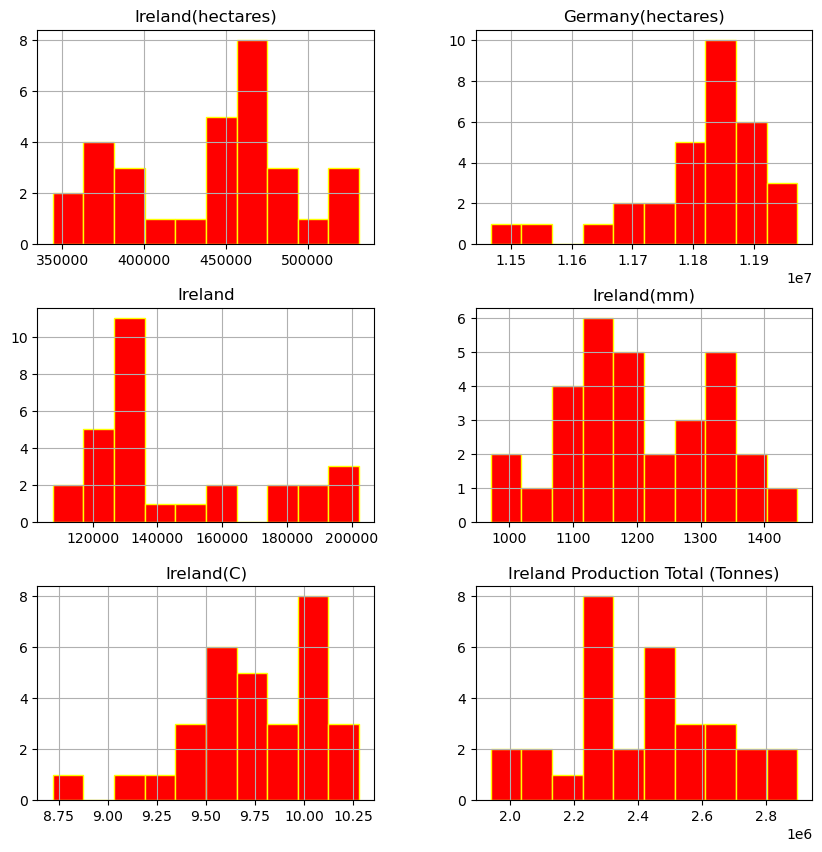

In [61]:
# 1.5.2 Producing Histogram for Datasets
# Producing Histogram for Each Variable of Ireland
ireland_dataset.hist(figsize = (10,10), color = "Red", edgecolor = "Yellow" );

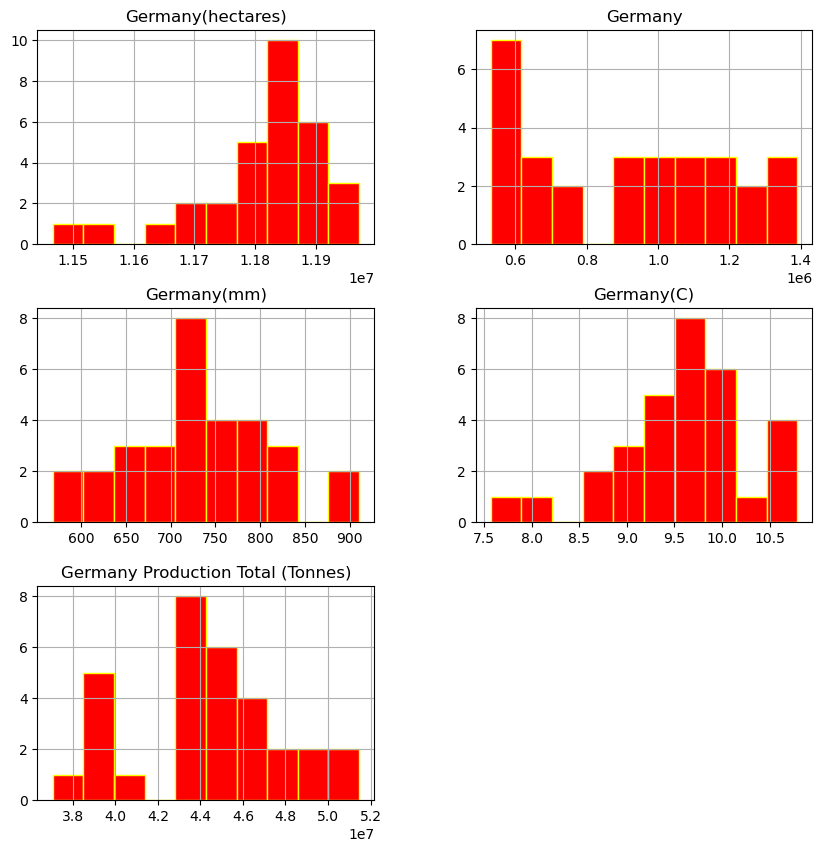

In [62]:
# Producing Histogram for Each Variable of Germany
germany_dataset.hist(figsize = (10,10), color = "Red", edgecolor = "Yellow");

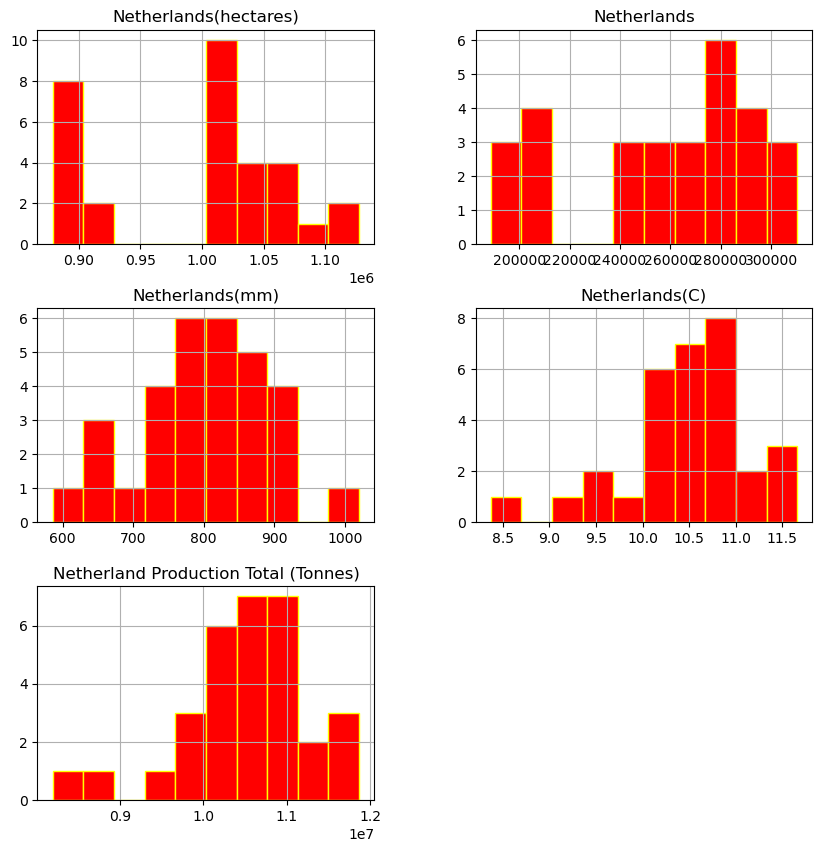

In [63]:
# Producing Histogram for Each Variable of Netherland
netherland_dataset.hist(figsize = (10,10), color = "Red", edgecolor = "Yellow");

#### Ireland Boxplots

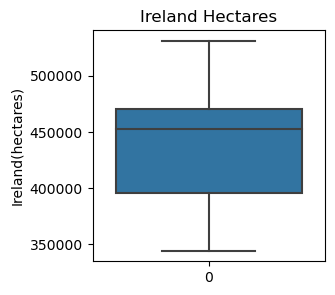

In [64]:
# Burada Anlaşılmayı Arttırmak İçin Böyle Yaptık bunu belirt!. 
hectares      = ireland_dataset["Ireland(hectares)"]
ireland       = ireland_dataset["Ireland"]
ireland_mm    = ireland_dataset["Ireland(mm)"]
ireland_c     = ireland_dataset["Ireland(C)"]
ireland_total = ireland_dataset["Ireland Production Total (Tonnes)"]
# 1. Hectares Boxplot
fig = plt.figure(figsize =(3, 3))
plt.title("Ireland Hectares")
plt.ylabel("Ireland(hectares)")
sns.boxplot(hectares);

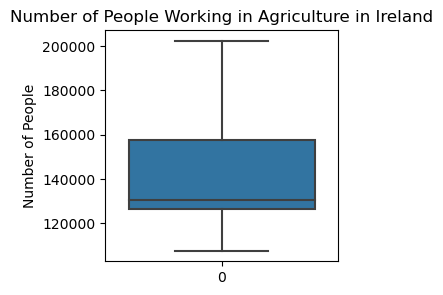

In [65]:
# 2. People who work in Ireland Agriculture
fig = plt.figure(figsize =(3, 3))
plt.title("Number of People Working in Agriculture in Ireland")
plt.ylabel("Number of People")
sns.boxplot(ireland);

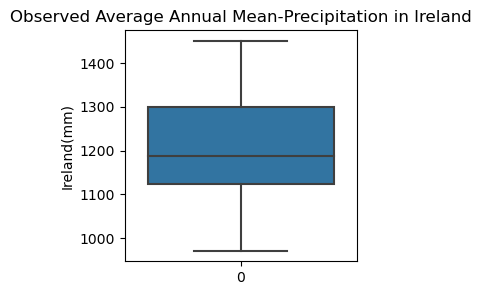

In [66]:
# 3. Observed Average Annual Mean Precipitation in Ireland
fig = plt.figure(figsize =(3, 3))
plt.title("Observed Average Annual Mean-Precipitation in Ireland")
plt.ylabel("Ireland(mm)")
sns.boxplot(ireland_mm);

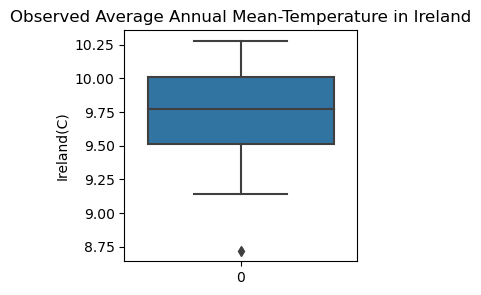

In [67]:
# 4. Observed Average Annual Mean-Temperature in Ireland
fig = plt.figure(figsize =(3, 3))
plt.title("Observed Average Annual Mean-Temperature in Ireland")
plt.ylabel("Ireland(C)")
sns.boxplot(ireland_c);

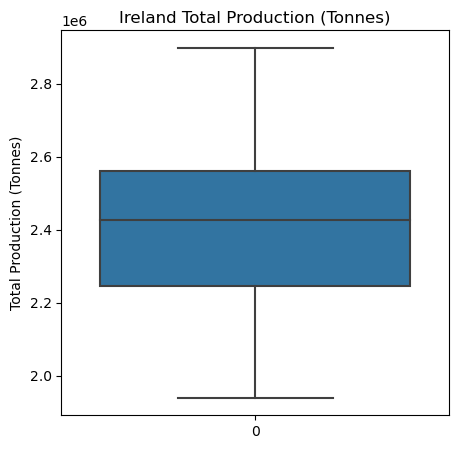

In [68]:
# 5. Ireland Total Production (Tonnes)
fig = plt.figure(figsize =(5, 5))
plt.title("Ireland Total Production (Tonnes)")
plt.ylabel("Total Production (Tonnes)")
sns.boxplot(ireland_total);

#### Germany Boxplots

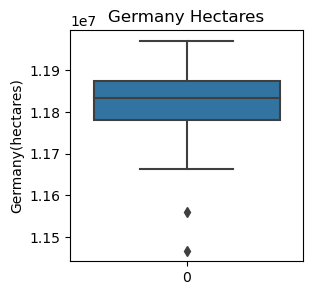

In [69]:
# Burada Anlaşılmayı Arttırmak İçin Böyle Yaptık bunu belirt!. 
# 1. Germany Hectares
hectares1     = germany_dataset["Germany(hectares)"]
germany       = germany_dataset["Germany"]
germany_mm    = germany_dataset["Germany(mm)"]
germany_c     = germany_dataset["Germany(C)"]
germany_total = germany_dataset["Germany Production Total (Tonnes)"]
# 1. Hectares Boxplot
fig = plt.figure(figsize =(3, 3))
plt.title("Germany Hectares")
plt.ylabel("Germany(hectares)")
sns.boxplot(hectares1);

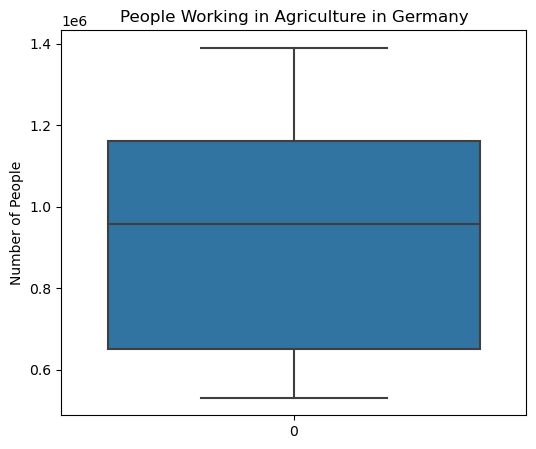

In [70]:
# 2. People who work in Germany Agriculture
fig = plt.figure(figsize =(6, 5))
plt.title("People Working in Agriculture in Germany")
plt.ylabel("Number of People")
sns.boxplot(germany);

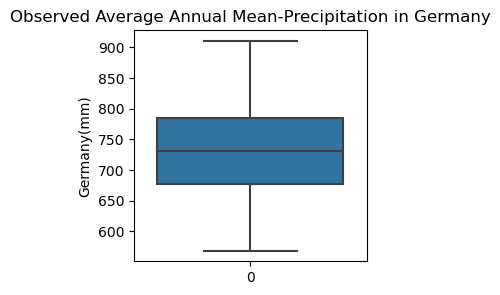

In [71]:
# 3. Observed Average Annual Mean Precipitation in Germany
fig = plt.figure(figsize =(3, 3))
plt.title("Observed Average Annual Mean-Precipitation in Germany")
plt.ylabel("Germany(mm)")
sns.boxplot(germany_mm);

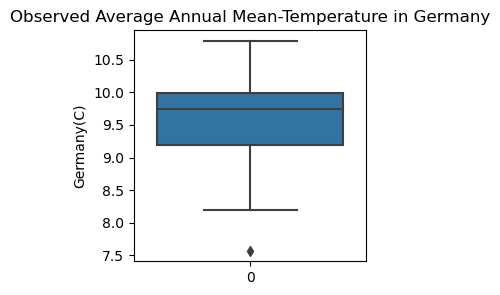

In [72]:
# 4. Observed Average Annual Mean-Temperature in Ireland
fig = plt.figure(figsize =(3, 3))
plt.title("Observed Average Annual Mean-Temperature in Germany")
plt.ylabel("Germany(C)")
sns.boxplot(germany_c);


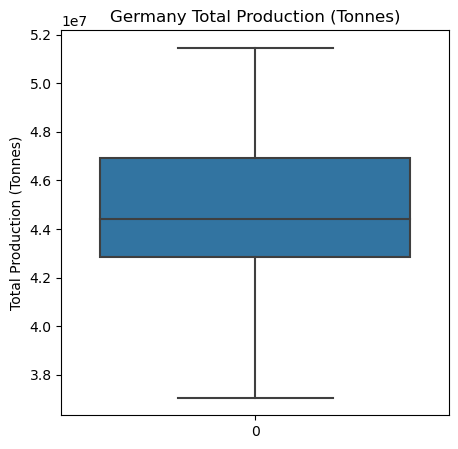

In [73]:
# 5. Ireland Total Production (Tonnes)
fig = plt.figure(figsize =(5, 5))
plt.title("Germany Total Production (Tonnes)")
plt.ylabel("Total Production (Tonnes)")
sns.boxplot(germany_total);

#### Netherland Boxplots

In [74]:
# Burada Anlaşılmayı Arttırmak İçin Böyle Yaptık bunu belirt!. 
hectares2        = netherland_dataset["Netherlands(hectares)"]
netherland       = netherland_dataset["Netherlands"]
netherland_mm    = netherland_dataset["Netherlands(mm)"]
netherland_c     = netherland_dataset["Netherlands(C)"]
netherland_total = netherland_dataset["Netherland Production Total (Tonnes)"]

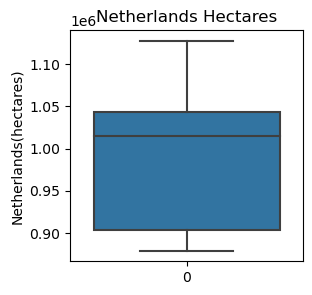

In [75]:
# 1. Hectares Boxplot
fig = plt.figure(figsize =(3, 3))
plt.title("Netherlands Hectares")
plt.ylabel("Netherlands(hectares)")
sns.boxplot(hectares2);

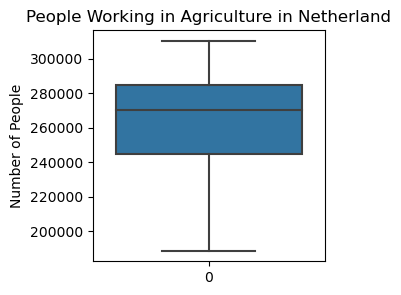

In [76]:
# 2. People who work in Netherland Agriculture
fig = plt.figure(figsize =(3, 3))
plt.title("People Working in Agriculture in Netherland")
plt.ylabel("Number of People")
sns.boxplot(netherland);

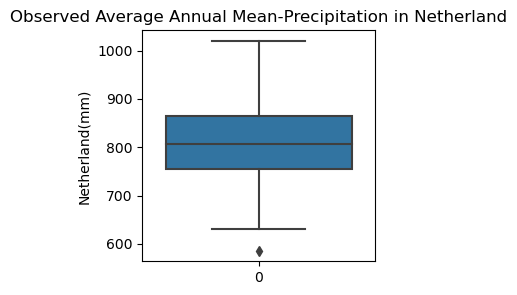

In [77]:
# 3. Observed Average Annual Mean Precipitation in Netherland
fig = plt.figure(figsize =(3, 3))
plt.title("Observed Average Annual Mean-Precipitation in Netherland")
plt.ylabel("Netherland(mm)")
sns.boxplot(netherland_mm);

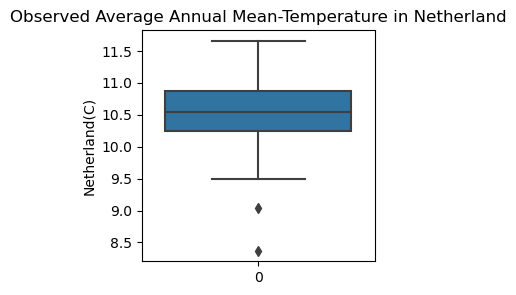

In [78]:
# 4. Observed Average Annual Mean-Temperature in Netherland
fig = plt.figure(figsize =(3, 3))
plt.title("Observed Average Annual Mean-Temperature in Netherland")
plt.ylabel("Netherland(C)")
sns.boxplot(netherland_c);

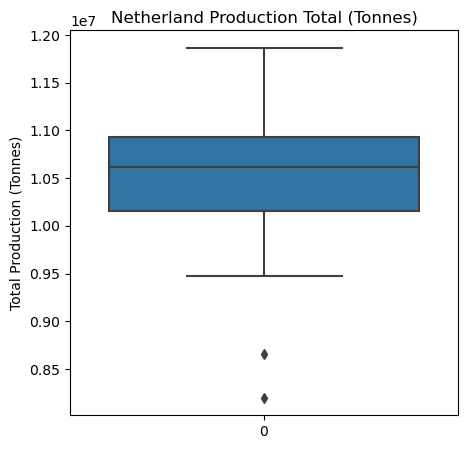

In [79]:
# 5. Netherland Total Production (Tonnes)
fig = plt.figure(figsize =(5, 5))
plt.title("Netherland Production Total (Tonnes)")
plt.ylabel("Total Production (Tonnes)")
sns.boxplot(netherland_total);

#### Skewness and Kurtosis

In [ ]:
#Skewness = 0: Then normally distributed.
#Skewness > 0: Then more weight in the left tail of the distribution.
#Skewness < 0: Then more weight in the right tail of the distribution.


#kurtosis for normal distribution is equal to 3.
#For a distribution having kurtosis < 3: It is called playkurtic.
#For a distribution having kurtosis > 3, It is called leptokurtic and it signifies that it tries to produce more outliers rather than the normal distribution.

In [81]:
# Ireland Skewness
print("Ireland Dataset Skewness")
print("---------------------------------")
print(ireland_dataset.skew(axis = 0, skipna=True))

Ireland Dataset Skewness
---------------------------------
Ireland(hectares)                   -0.259119
Germany(hectares)                   -1.507499
Ireland                              0.927390
Ireland(mm)                          0.125509
Ireland(C)                          -0.917392
Ireland Production Total (Tonnes)    0.114341
dtype: float64


In [82]:
# Ireland Kurtosis
print("Ireland Dataset Kurtosis")
print("---------------------------------")
print(ireland_dataset.kurt(axis=0))

Ireland Dataset Kurtosis
---------------------------------
Ireland(hectares)                   -0.840105
Germany(hectares)                    2.933921
Ireland                             -0.591462
Ireland(mm)                         -0.612021
Ireland(C)                           1.304995
Ireland Production Total (Tonnes)   -0.428080
dtype: float64


In [83]:
# Germany Skewness
print("Germany Dataset Skewness")
print("---------------------------------")
print(germany_dataset.skew(axis = 0, skipna = True))

Germany Dataset Skewness
---------------------------------
Germany(hectares)                   -1.507499
Germany                              0.084367
Germany(mm)                         -0.002150
Germany(C)                          -0.690212
Germany Production Total (Tonnes)   -0.083765
dtype: float64


In [84]:
# Germany Kurtosis
print("Germany Dataset Kurtosis")
print("---------------------------------")
print(germany_dataset.kurt(axis=0))

Germany Dataset Kurtosis
---------------------------------
Germany(hectares)                    2.933921
Germany                             -1.375508
Germany(mm)                          0.204451
Germany(C)                           1.189728
Germany Production Total (Tonnes)   -0.386238
dtype: float64


In [85]:
# Netherland Skewness
print("Netherland Dataset Skewness")
print("---------------------------------")
print(netherland_dataset.skew(axis = 0, skipna = True))

Netherland Dataset Skewness
---------------------------------
Netherlands(hectares)                  -0.328114
Netherlands                            -0.647296
Netherlands(mm)                        -0.217814
Netherlands(C)                         -0.999323
Netherland Production Total (Tonnes)   -1.077194
dtype: float64


In [86]:
# Net Kurtosis
print("Netherland Dataset Kurtosis")
print("---------------------------------")
print(netherland_dataset.kurt(axis=0))

Netherland Dataset Kurtosis
---------------------------------
Netherlands(hectares)                  -1.191318
Netherlands                            -0.865510
Netherlands(mm)                         0.063332
Netherlands(C)                          1.815575
Netherland Production Total (Tonnes)    2.216017
dtype: float64


#### 1.6  Inferential Statistics Process
In this section, the distribution of the data will be plotted, the standard error value will be found, the Z score will be calculated.

**Ireland Dataset Each Columns Distribution**

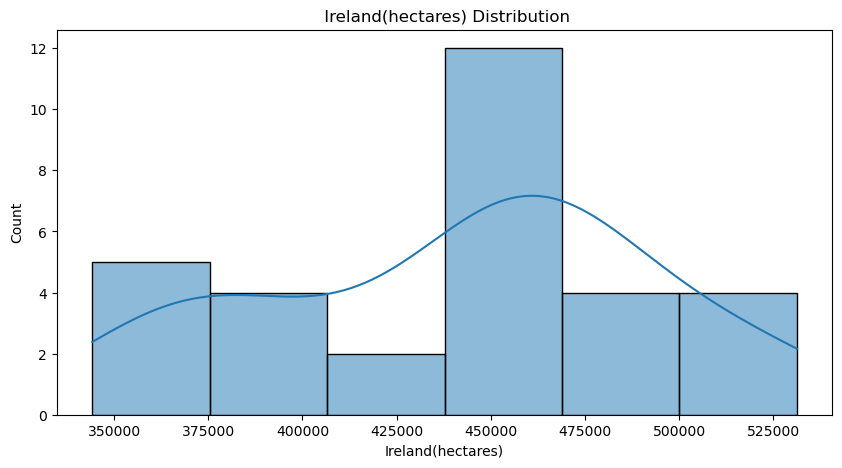

In [87]:
# 1.
plt.figure(figsize=(10,5))
graphHectares = sns.histplot(ireland_dataset['Ireland(hectares)'], kde=True).set(title=' Ireland(hectares) Distribution')

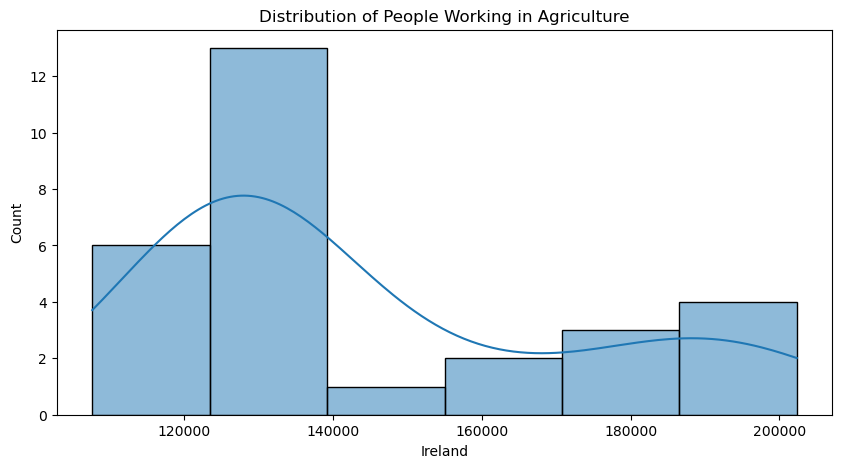

In [88]:
# 2
plt.figure(figsize=(10,5))
graphIreland = sns.histplot(ireland_dataset['Ireland'], kde=True).set(title="Distribution of People Working in Agriculture")

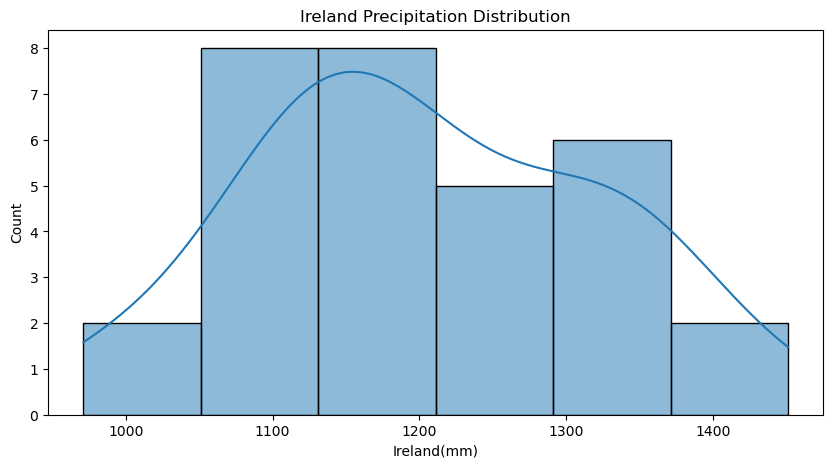

In [89]:
# 3
plt.figure(figsize=(10,5))
graphPrecipitation = sns.histplot(ireland_dataset["Ireland(mm)"], kde=True).set(title="Ireland Precipitation Distribution")

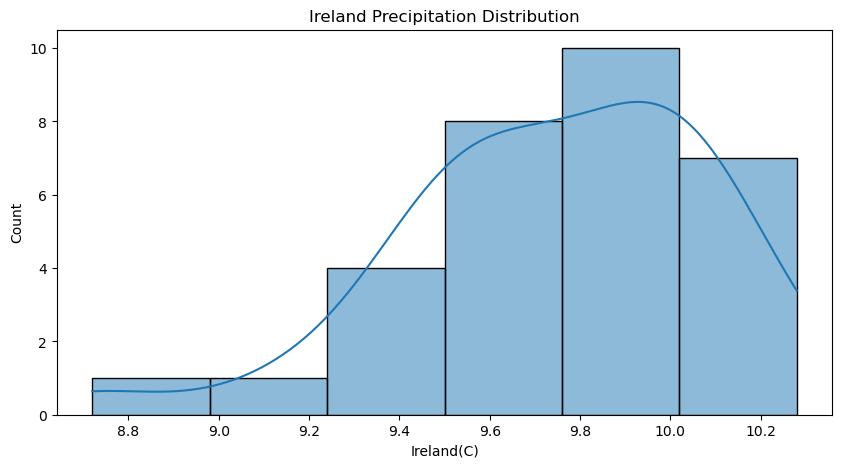

In [90]:
# 4
plt.figure(figsize=(10,5))
graphTemperature = sns.histplot(ireland_dataset["Ireland(C)"], kde=True).set(title="Ireland Precipitation Distribution")

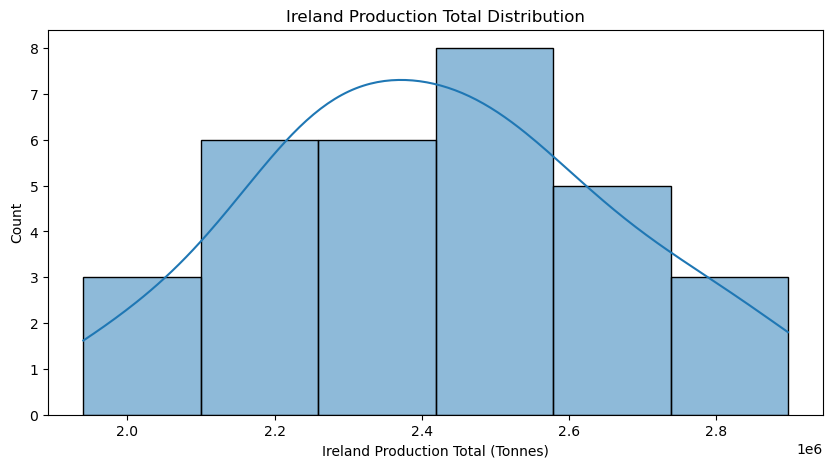

In [91]:
# 5
plt.figure(figsize=(10,5))
graphTonnes = sns.histplot(ireland_dataset['Ireland Production Total (Tonnes)'], kde=True).set(title="Ireland Production Total Distribution")

**Germany Dataset Each Columns Distribution**

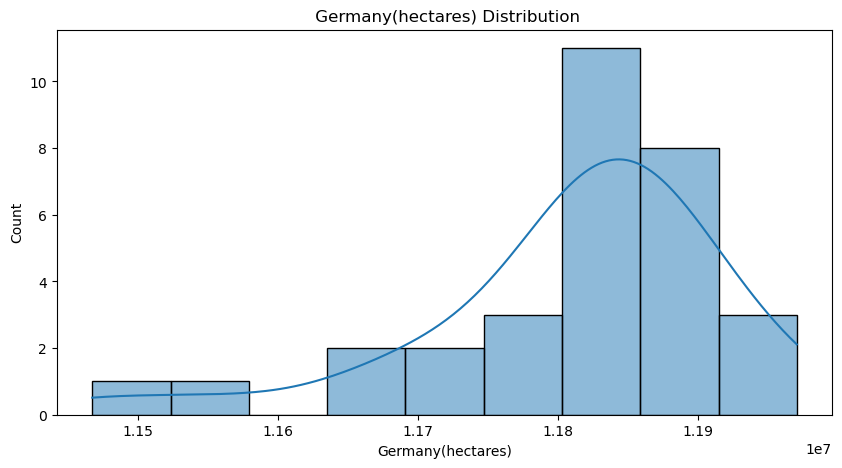

In [92]:
# 1
plt.figure(figsize=(10,5))
graphHectares_de = sns.histplot(germany_dataset['Germany(hectares)'], kde=True).set(title=' Germany(hectares) Distribution')

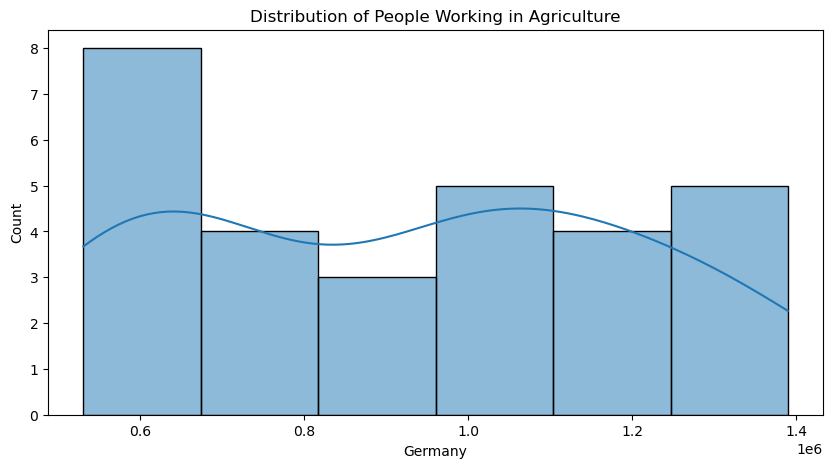

In [93]:
# 2
plt.figure(figsize=(10,5))
graphGermany = sns.histplot(germany_dataset['Germany'], kde=True).set(title="Distribution of People Working in Agriculture")

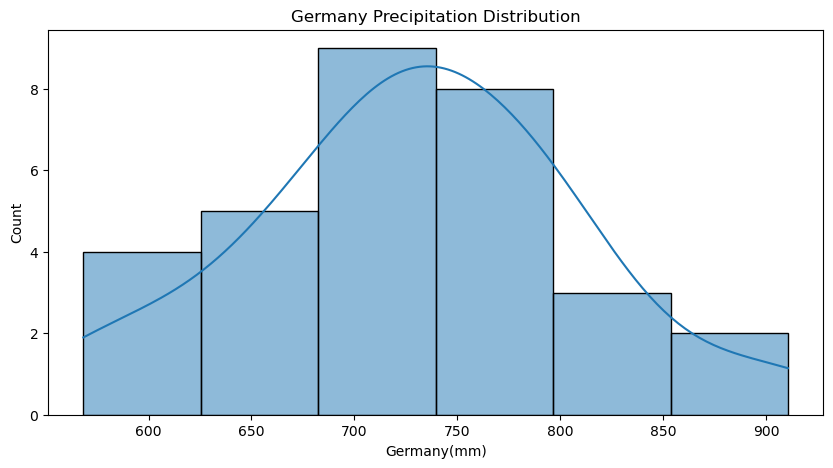

In [94]:
# 3
plt.figure(figsize=(10,5))
graphPrecipitation1 = sns.histplot(germany_dataset["Germany(mm)"], kde=True).set(title="Germany Precipitation Distribution")

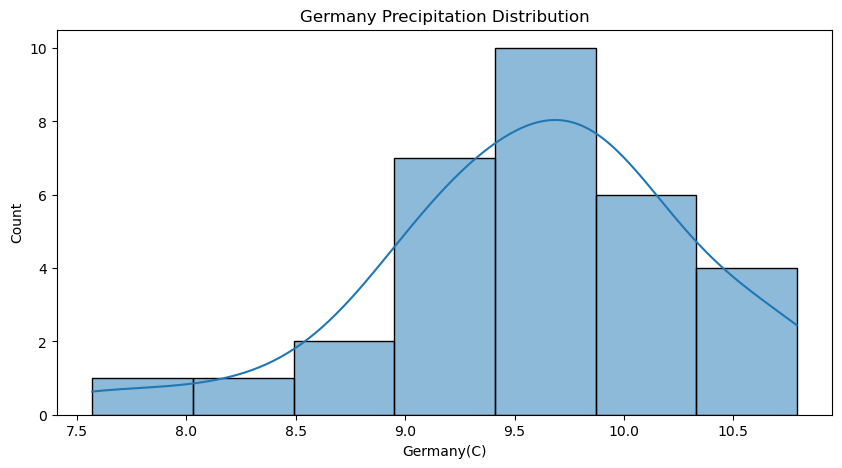

In [95]:
# 4
plt.figure(figsize=(10,5))
graphTemperature1 = sns.histplot(germany_dataset["Germany(C)"], kde=True).set(title="Germany Precipitation Distribution")

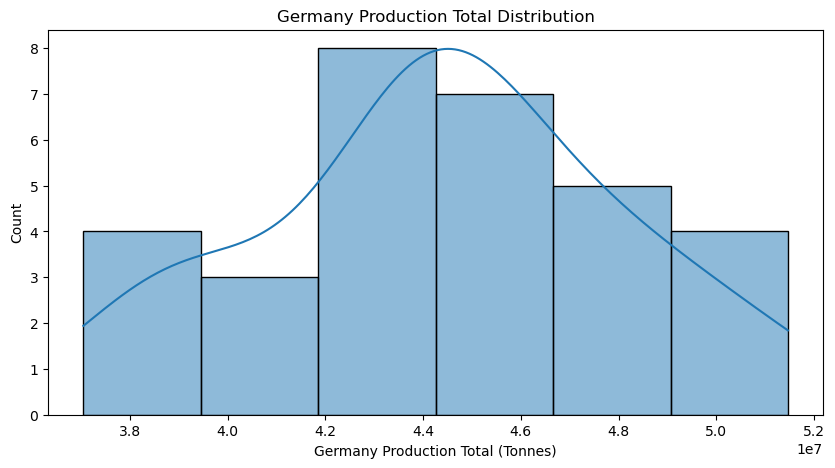

In [96]:
# 5
plt.figure(figsize=(10,5))
graphTonnes1 = sns.histplot(germany_dataset['Germany Production Total (Tonnes)'], kde=True).set(title="Germany Production Total Distribution")

**Netherland Dataset Each Columns Distribution**

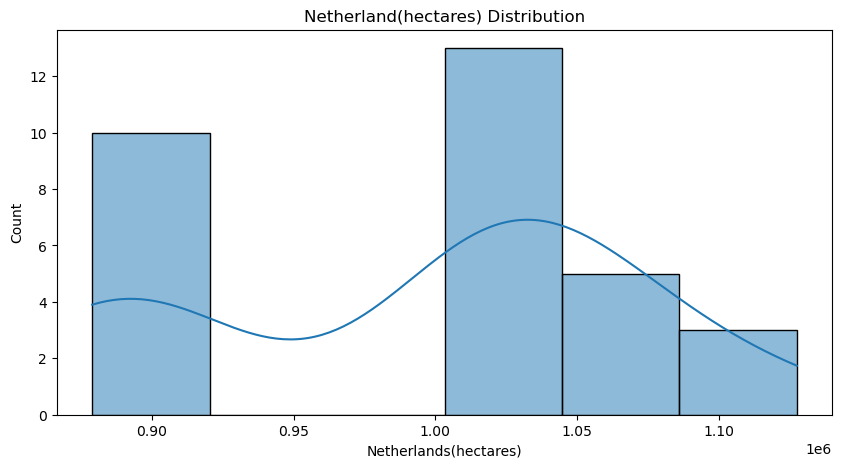

In [97]:
1
plt.figure(figsize=(10,5))
graphHectares = sns.histplot(netherland_dataset['Netherlands(hectares)'], kde=True).set(title='Netherland(hectares) Distribution')

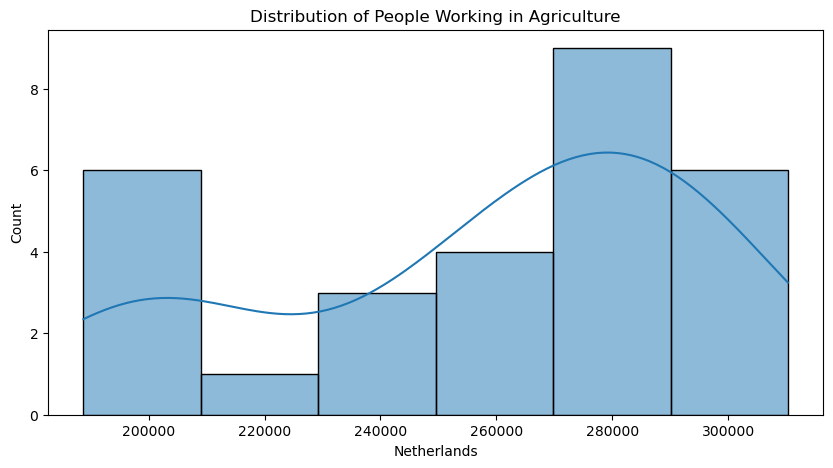

In [98]:
# 2
plt.figure(figsize=(10,5))
graphIreland = sns.histplot(netherland_dataset['Netherlands'], kde=True).set(title="Distribution of People Working in Agriculture")

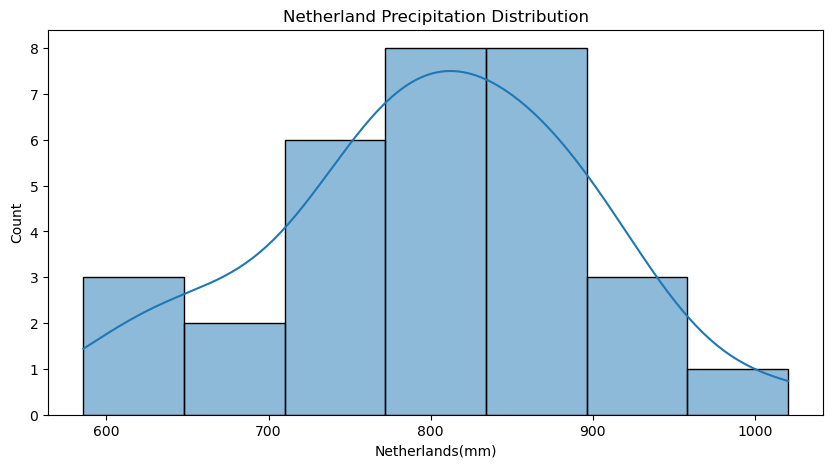

In [99]:
# 3.
plt.figure(figsize=(10,5))
graphPrecipitation = sns.histplot(netherland_dataset["Netherlands(mm)"], kde=True).set(title="Netherland Precipitation Distribution")

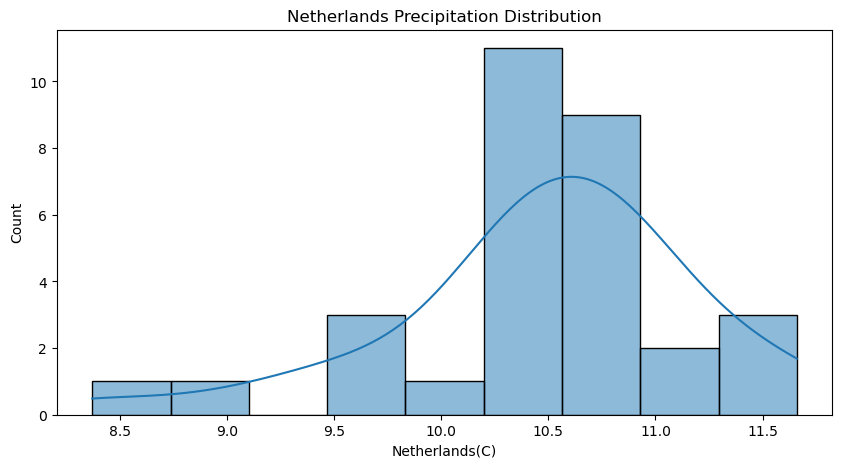

In [100]:
# 4.
plt.figure(figsize=(10,5))
graphTemperature = sns.histplot(netherland_dataset["Netherlands(C)"], kde=True).set(title="Netherlands Precipitation Distribution")

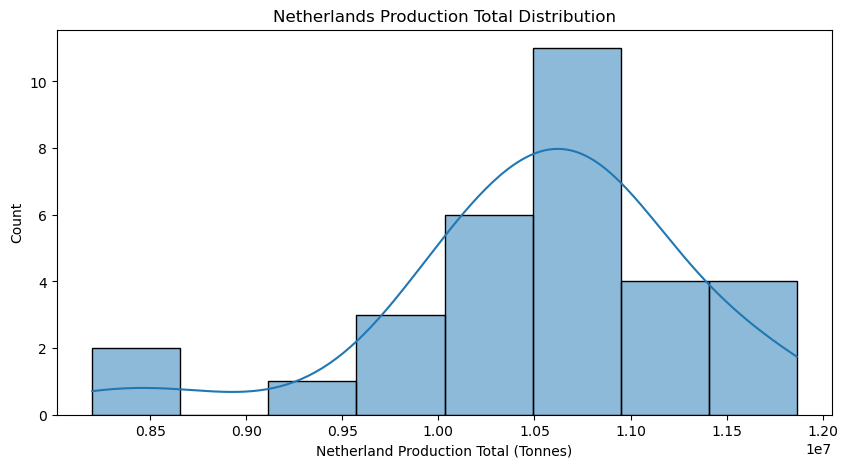

In [101]:
# 5.
plt.figure(figsize=(10,5))
graphTonnes = sns.histplot(netherland_dataset['Netherland Production Total (Tonnes)'], kde=True).set(title="Netherlands Production Total Distribution")

#### Statistical Analysis

In [102]:
# Datasets Here.
data1 = ireland_dataset["Ireland Production Total (Tonnes)"].sample(n=31)
data2 = germany_dataset["Germany Production Total (Tonnes)"].sample(n=31)
data3 = netherland_dataset["Netherland Production Total (Tonnes)"].sample(n=31)

#### Wilcoxon Test

In [104]:
# Wilcoxon Test  
stat, p = wilcoxon(data1, data2)
print("Statistics=%.3f, p=%.3f" % (stat, p))
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is significant difference between median values (H0 can be rejected)")

Statistics=0.000, p=0.000
There is significant difference between median values (H0 can be rejected)


#### One-Sample Hypothesis Test

In [105]:
# Ireland..
print("For Ireland..")
stat, p_ireland = ttest_1samp(data1, 0.8)

# Test Result
print("Statistics=%.3f, p_ireland=%.3f" % (stat, p_ireland))

For Ireland..
Statistics=56.210, p_ireland=0.000


In [106]:
# Êvaluate P Value 
alpha = 0.05
if p_ireland > alpha:
    print("The mean of the dataset is equal to 0.8 (H0 cannot be rejected)")
else:
    print("The mean of the dataset does not equal 0.8 (H0 is rejected)")

The mean of the dataset does not equal 0.8 (H0 is rejected)


In [107]:
# Germany..
print("For Germany")
stat, p_germany = ttest_1samp(data2, 0.8)

# Test sonucunu yazdıralım
print("Statistics=%.3f, p_germany=%.3f" % (stat, p_germany))

For Germany
Statistics=67.477, p_germany=0.000


In [108]:
# Êvaluate P Value 
alpha = 0.05
if p_germany > alpha:
    print("The mean of the dataset is equal to 0.8 (H0 cannot be rejected)")
else:
    print("The mean of the dataset does not equal 0.8 (H0 is rejected)")

The mean of the dataset does not equal 0.8 (H0 is rejected)


In [109]:
# Netherland..
print("For Netherland")
stat, p_netherland = ttest_1samp(data3, 0.8)

# Test sonucunu yazdıralım
print("Statistics=%.3f, p_netherland=%.3f" % (stat, p_netherland))

For Netherland
Statistics=75.471, p_netherland=0.000


In [110]:
# Êvaluate P Value 
alpha = 0.05
if p_netherland > alpha:
    print("The mean of the dataset is equal to 0.8 (H0 cannot be rejected)")
else:
    print("The mean of the dataset does not equal 0.8 (H0 is rejected)")

The mean of the dataset does not equal 0.8 (H0 is rejected)


#### T-Test

In [111]:
stat, p = ttest_ind(data1, data2)
print("Statistics=%.3f, p=%.3f" % (stat, p))

Statistics=-63.669, p=0.000


In [112]:
# Evaluate P Value
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is a significant difference between the median values ​​(H0 is rejected)")

There is a significant difference between the median values ​​(H0 is rejected)


#### Analysis of Variance

In [113]:
# Anova
stat, p = f_oneway(data1, data2)

# Test sonucunu yazdıralım
print("Statistics=%.3f, p=%.3f" % (stat, p))

# p değerini değerlendirelim
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is a significant difference between the median values ​​(H0 is rejected)")

Statistics=4053.775, p=0.000
There is a significant difference between the median values ​​(H0 is rejected)


#### Mann-Whitney U

In [114]:
statistic,p_value = mannwhitneyu(data1,data2,)
print("Statistic:",statistic)
print("p-value:",p_value)

Statistic: 0.0
p-value: 1.4018463184347286e-11


#### Standart Error

In [115]:
from scipy.stats import sem
sem_1 = sem(data1)
sem_2 = sem(data2)

print("SEM for Ireland Dataset..:",sem_1)
print("SEM for Germany Dataset..:",sem_2)

SEM for Ireland Dataset..: 42964.18476736866
SEM for Germany Dataset..: 657639.8072607609


#### Z Score

In [116]:
# Ireland.
stats.zscore(ireland_dataset, nan_policy="omit").head(5)

,Ireland(hectares),Germany(hectares),Ireland,Ireland(mm),Ireland(C),Ireland Production Total (Tonnes)
0,-1.155283,1.520986,NaN,-0.148952,0.795331,0.046672
1,-1.389801,-2.385315,2.083037,-1.145075,-0.700741,-0.093560
2,-1.897922,-3.257596,1.845481,-0.637108,-0.880270,0.446120
3,-1.507060,-1.276001,1.816780,0.221539,-1.388934,-1.483130
4,-1.682948,-0.052912,1.685971,0.903861,-0.760584,-1.236662


In [117]:
# Germany.
from scipy.stats import zscore
stats.zscore(germany_dataset, nan_policy="omit").head(5)

,Germany(hectares),Germany,Germany(mm),Germany(C),Germany Production Total (Tonnes)
0,1.520986,NaN,0.064354,0.303118,-0.186238
1,-2.385315,1.692377,-1.578189,-1.241536,-0.852024
2,-3.257596,1.584266,0.075475,0.059978,-1.593711
3,-1.276001,1.476154,0.813975,-1.198629,-1.483410
4,-0.052912,1.368043,0.760015,0.489048,-2.033325


In [118]:
# Netherland.
from scipy.stats import zscore
stats.zscore(netherland_dataset, nan_policy="omit").head(5)

,Netherlands(hectares),Netherlands,Netherlands(mm),Netherlands(C),Netherland Production Total (Tonnes)
0,-1.509463,NaN,-0.724050,0.377557,-0.518995
1,-1.483190,1.084415,-1.469013,-1.383135,-0.826028
2,-1.404372,1.034355,0.156643,-0.127559,0.271208
3,-1.404372,0.939892,0.729547,-1.426431,0.366507
4,-1.430645,0.895273,0.933977,0.103351,-0.424494
